In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('/content/credit.csv')

### **Data Understanding**

In [11]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [12]:
data.shape

(100000, 28)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [14]:
data.select_dtypes('object').columns

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [15]:
data.select_dtypes('float64').columns

Index(['Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [16]:
data.select_dtypes('int64').columns

Index(['ID', 'Customer_ID', 'Month'], dtype='object')

The dataset contain 7 categorical columns and 21 numerical columns





In [17]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### **Exploratory Data Analysis**

In [18]:
credit_score_counts = data['Credit_Score'].value_counts()
credit_score_counts

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

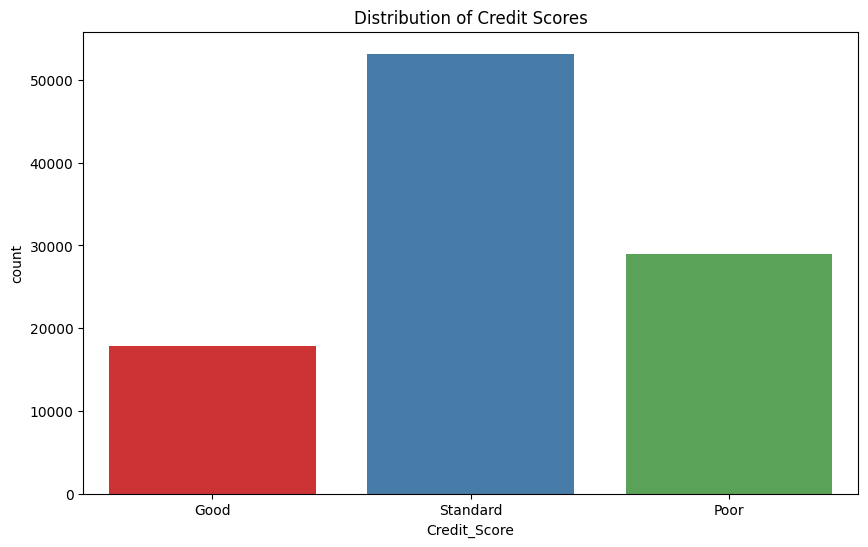

In [19]:
# Distribution of the target variable 'credit_score'

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Credit_Score', data = data, palette = 'Set1')
plt.title('Distribution of Credit Scores')
plt.show()

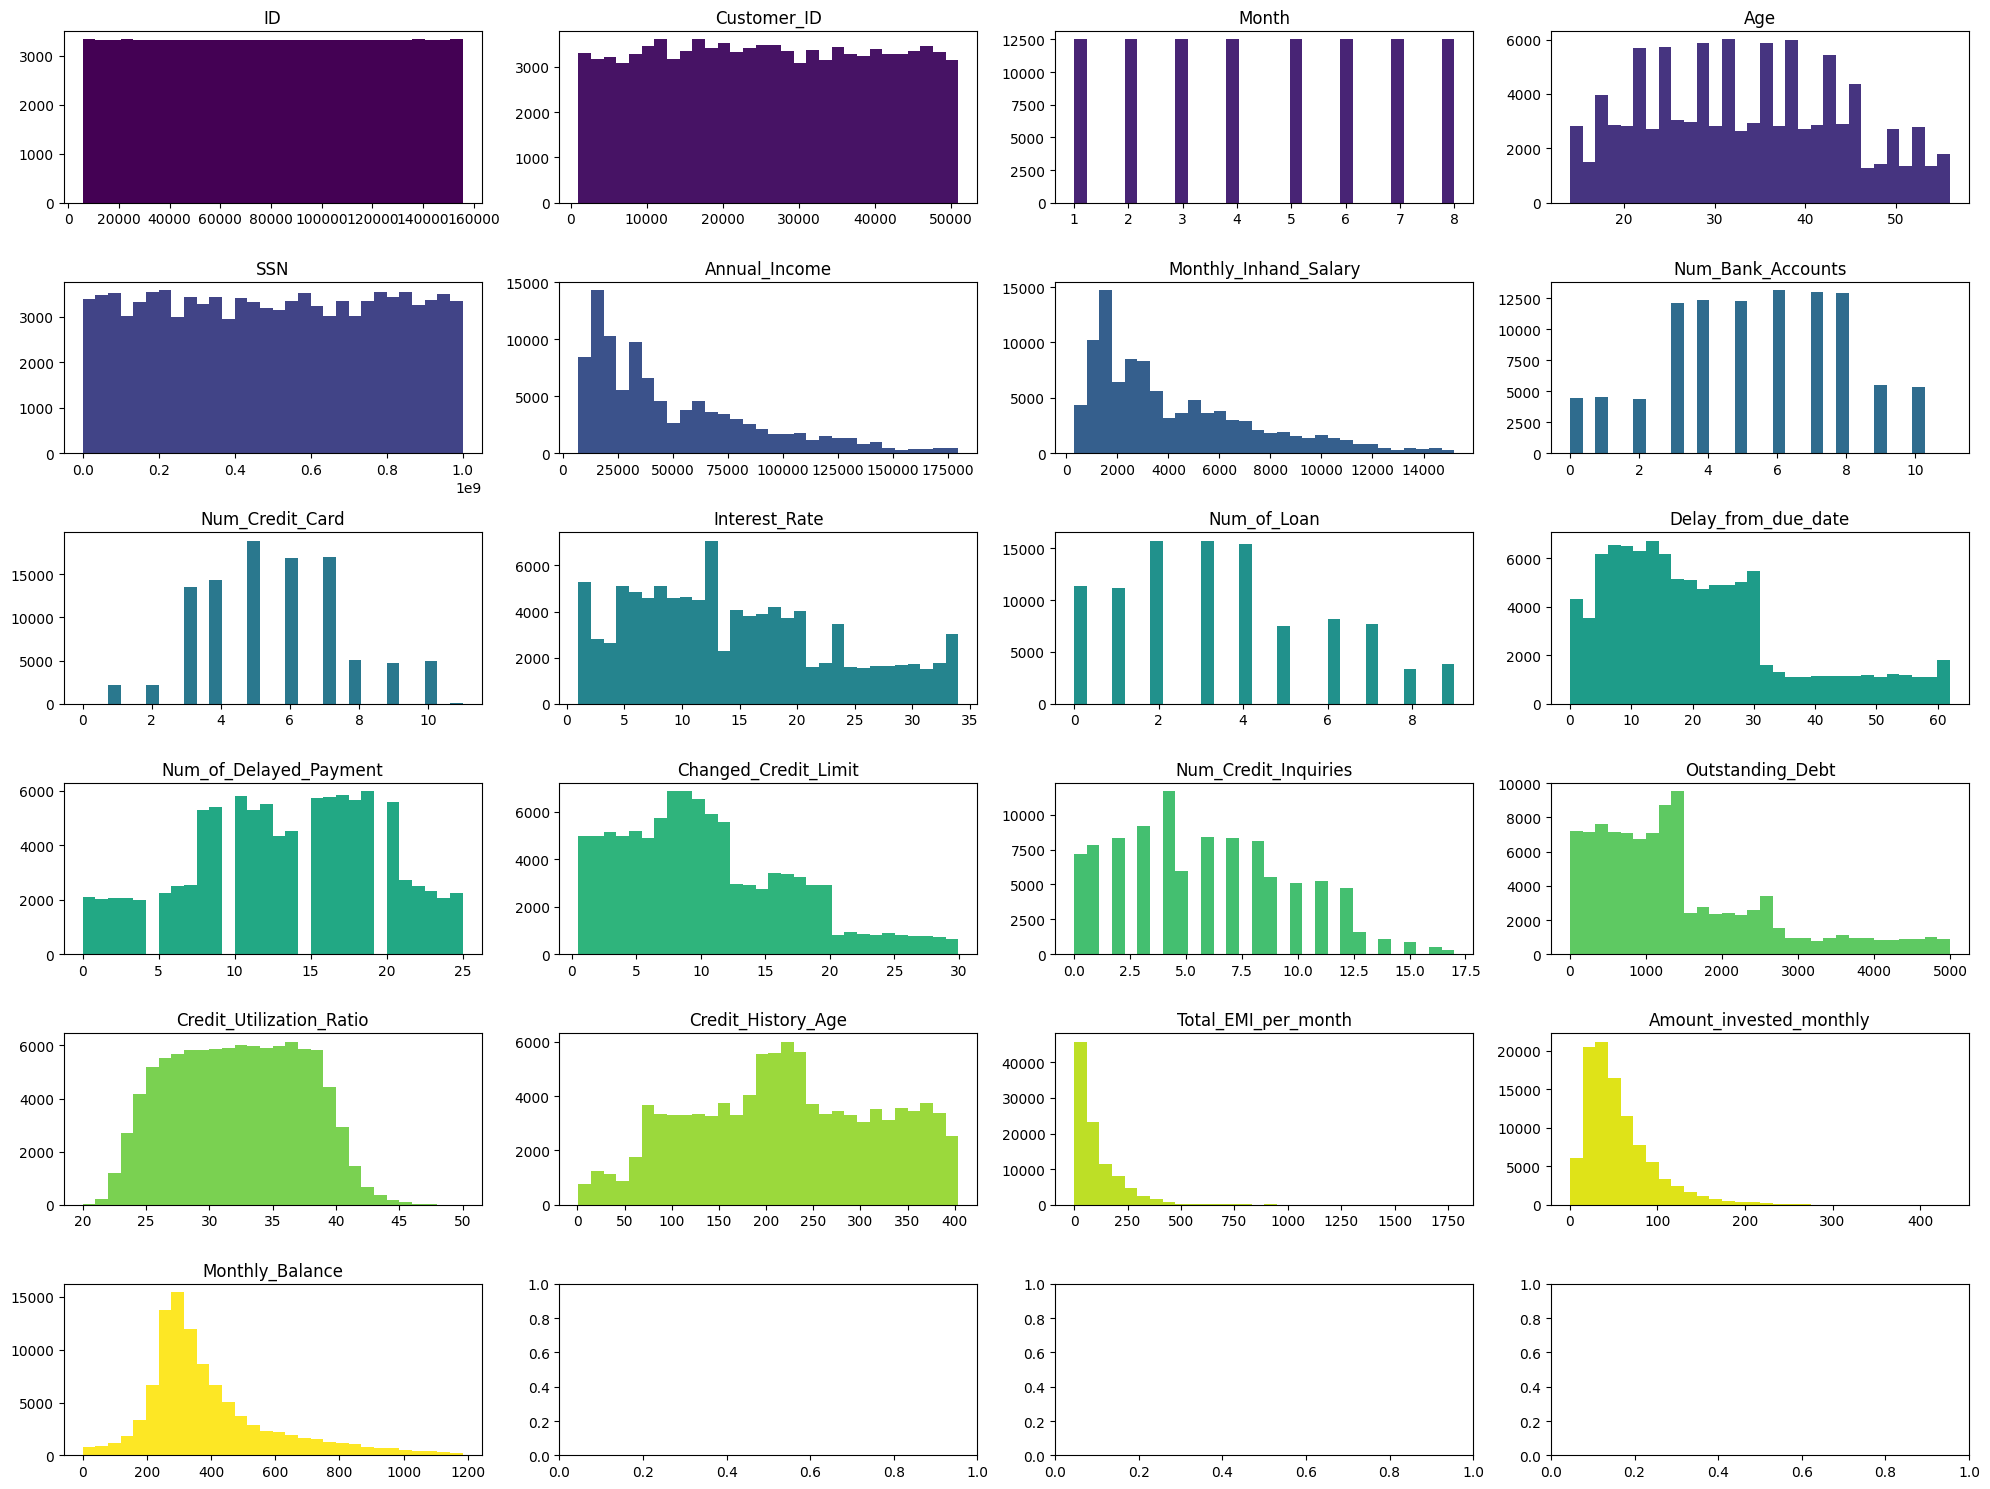

In [20]:
# Distribution of numerical columns

graph = data.select_dtypes(include=['float64', 'int64'])
colors = plt.cm.viridis(np.linspace(0, 1, len(graph.columns)))
fig, axes = plt.subplots(len(graph.columns)//4 + 1, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(graph.columns):
    axes[i].hist(graph[col], bins=30, color=colors[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64


Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64




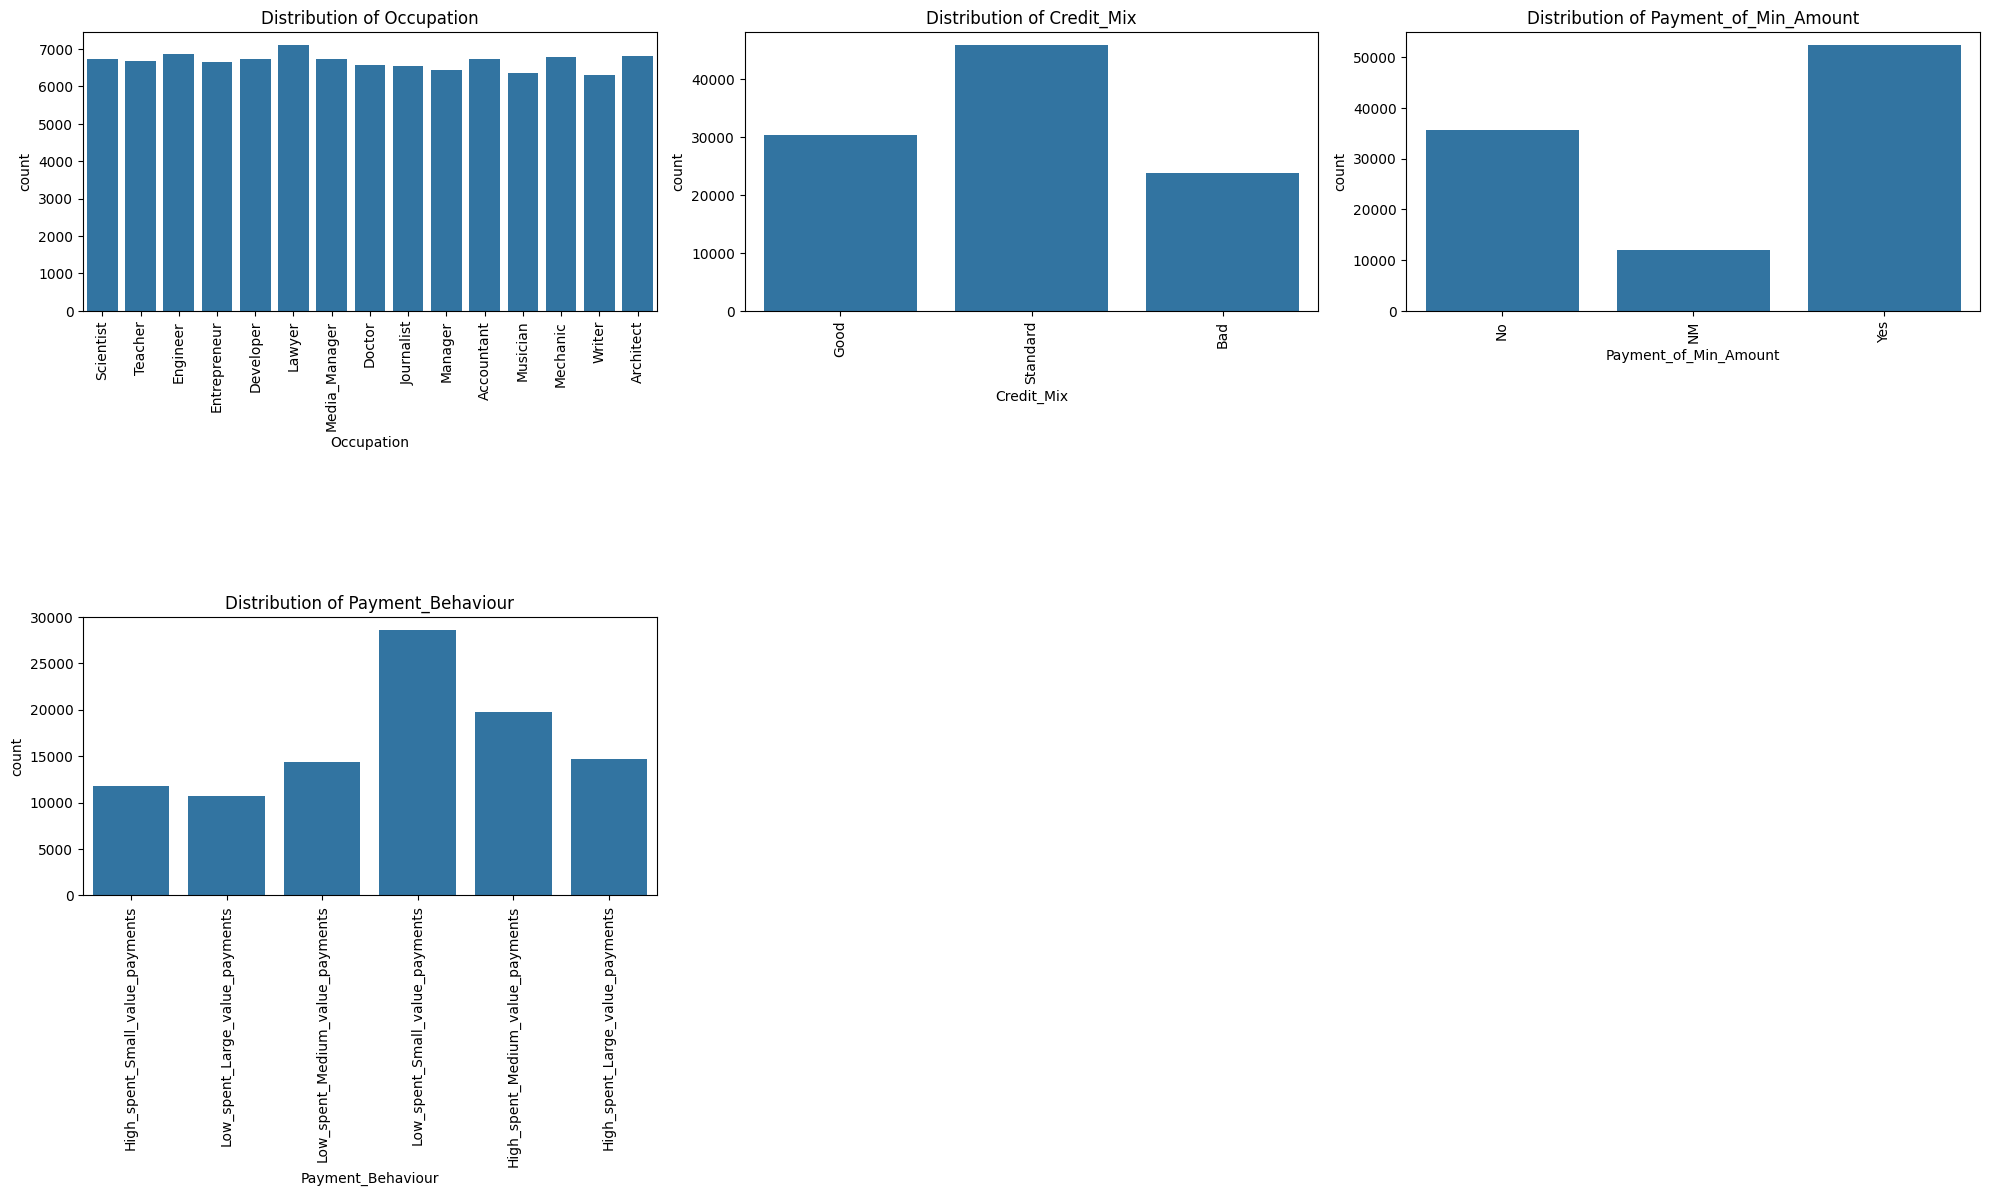

In [21]:
# Univariate Analysis for Categorical Columns

categorical_cols = ['Occupation', 'Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']

# Frequency Distribution
for col in categorical_cols:
    print(data[col].value_counts())
    print("\n")

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

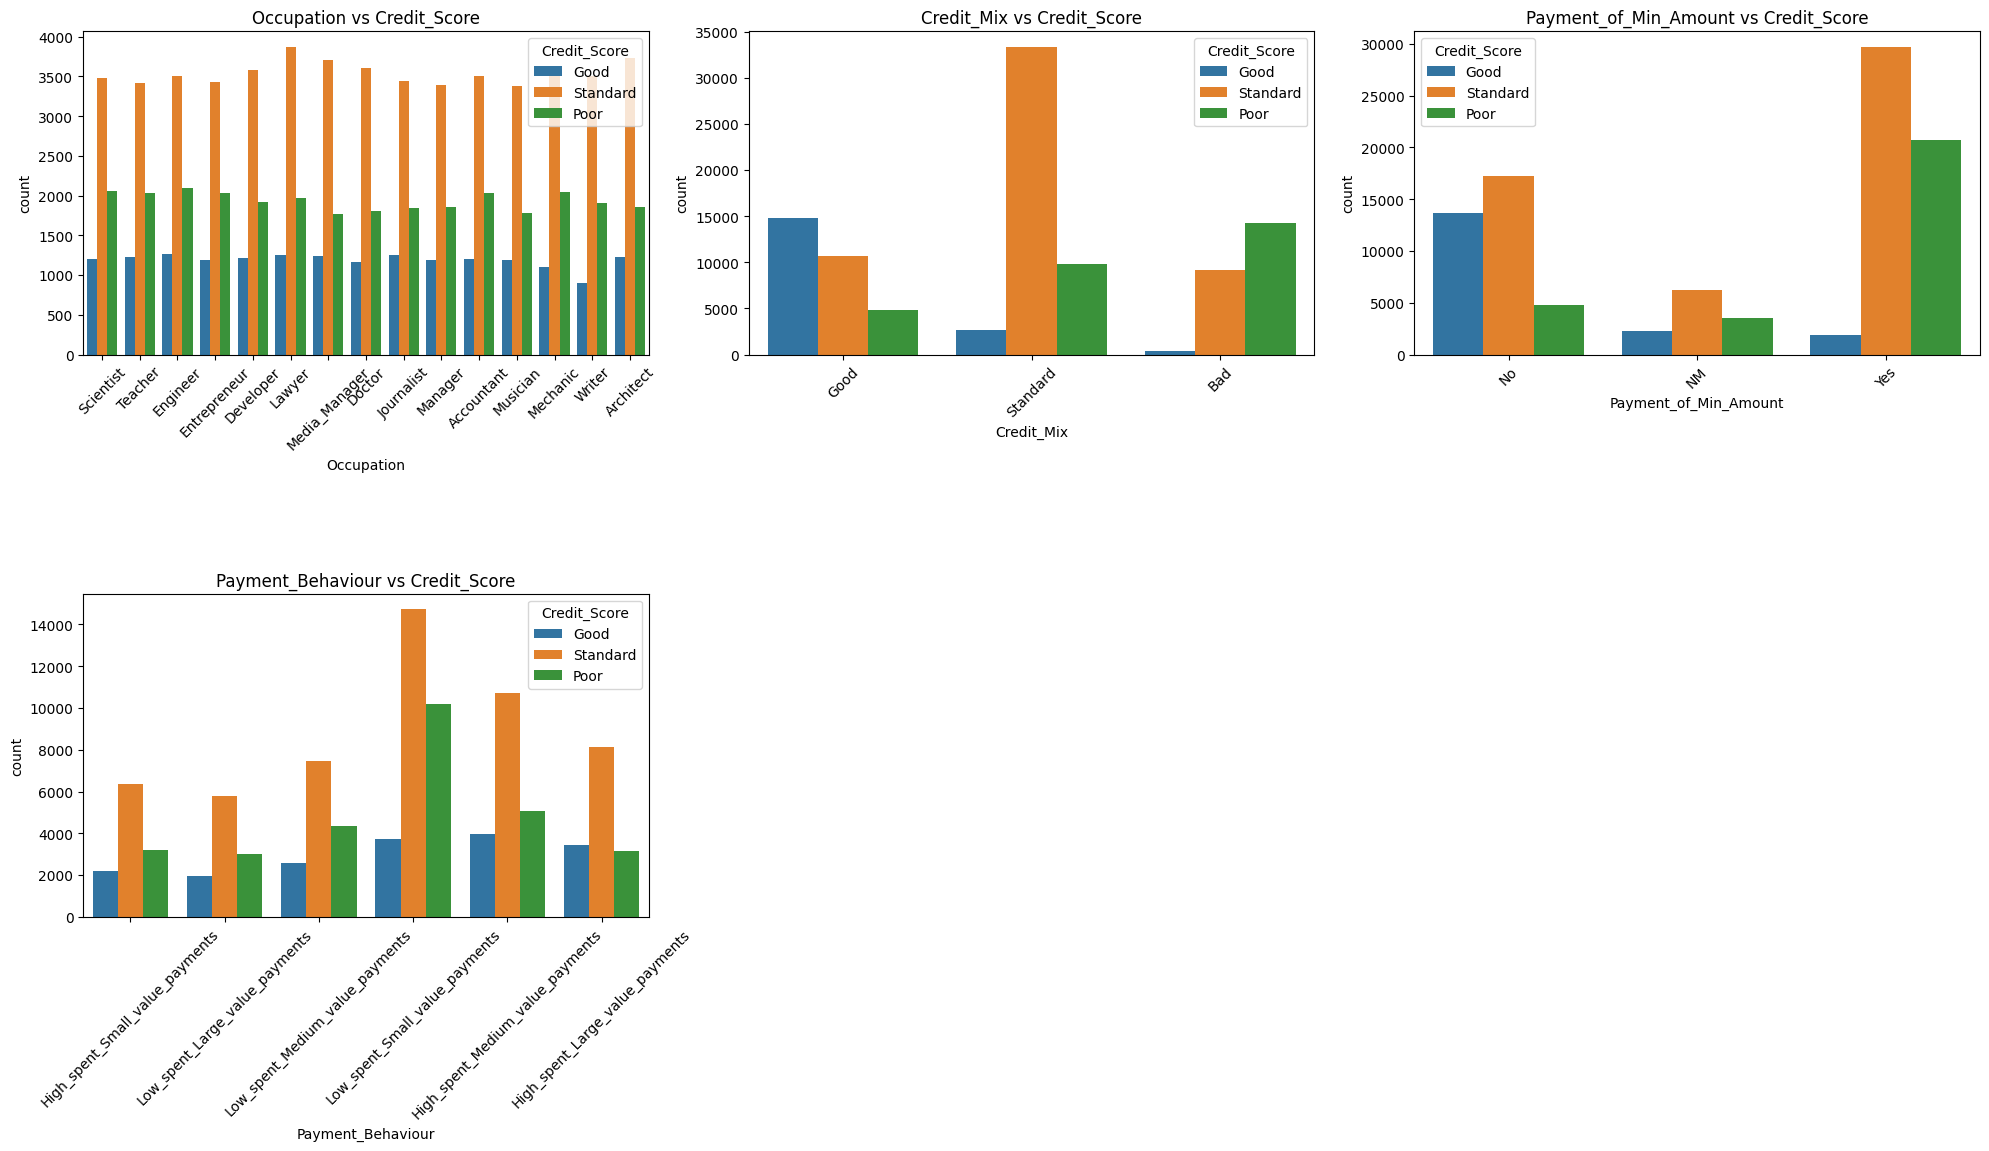

In [22]:
# Relationship between categorical features and 'Credit_Score'

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, hue='Credit_Score')
    plt.title(f'{col} vs Credit_Score')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

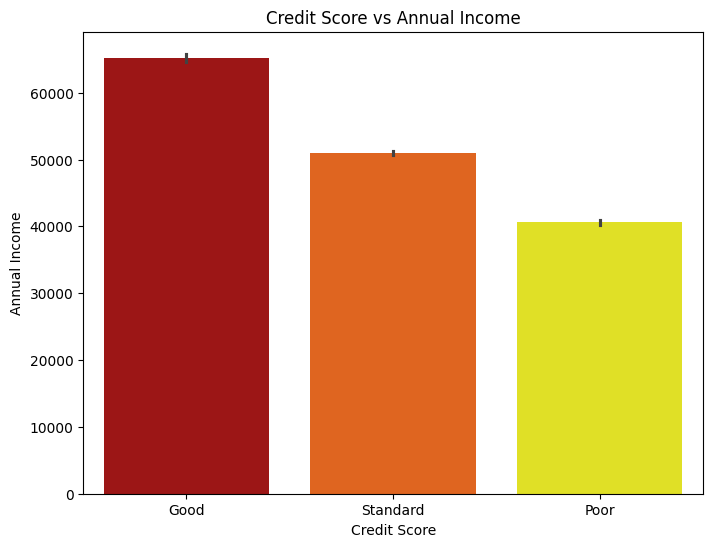

In [23]:
# credit_score against annual income

plt.figure(figsize=(8, 6))
sns.barplot(x='Credit_Score', y='Annual_Income', data=data, palette='hot')
plt.title('Credit Score vs Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

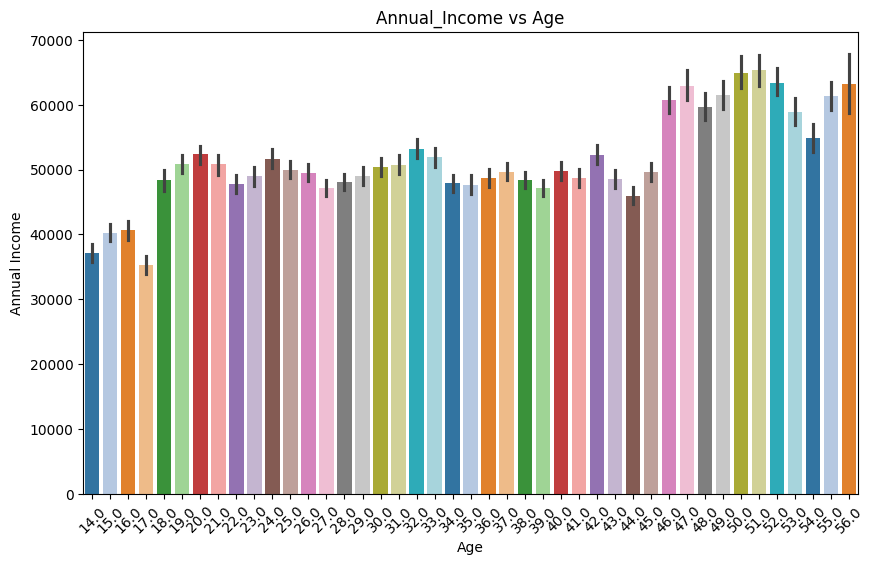

In [24]:
# Annual_Income against age

plt.figure(figsize=(10,6))
sns.barplot(data=data, x="Age", y="Annual_Income", palette='tab20')
plt.title('Annual_Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

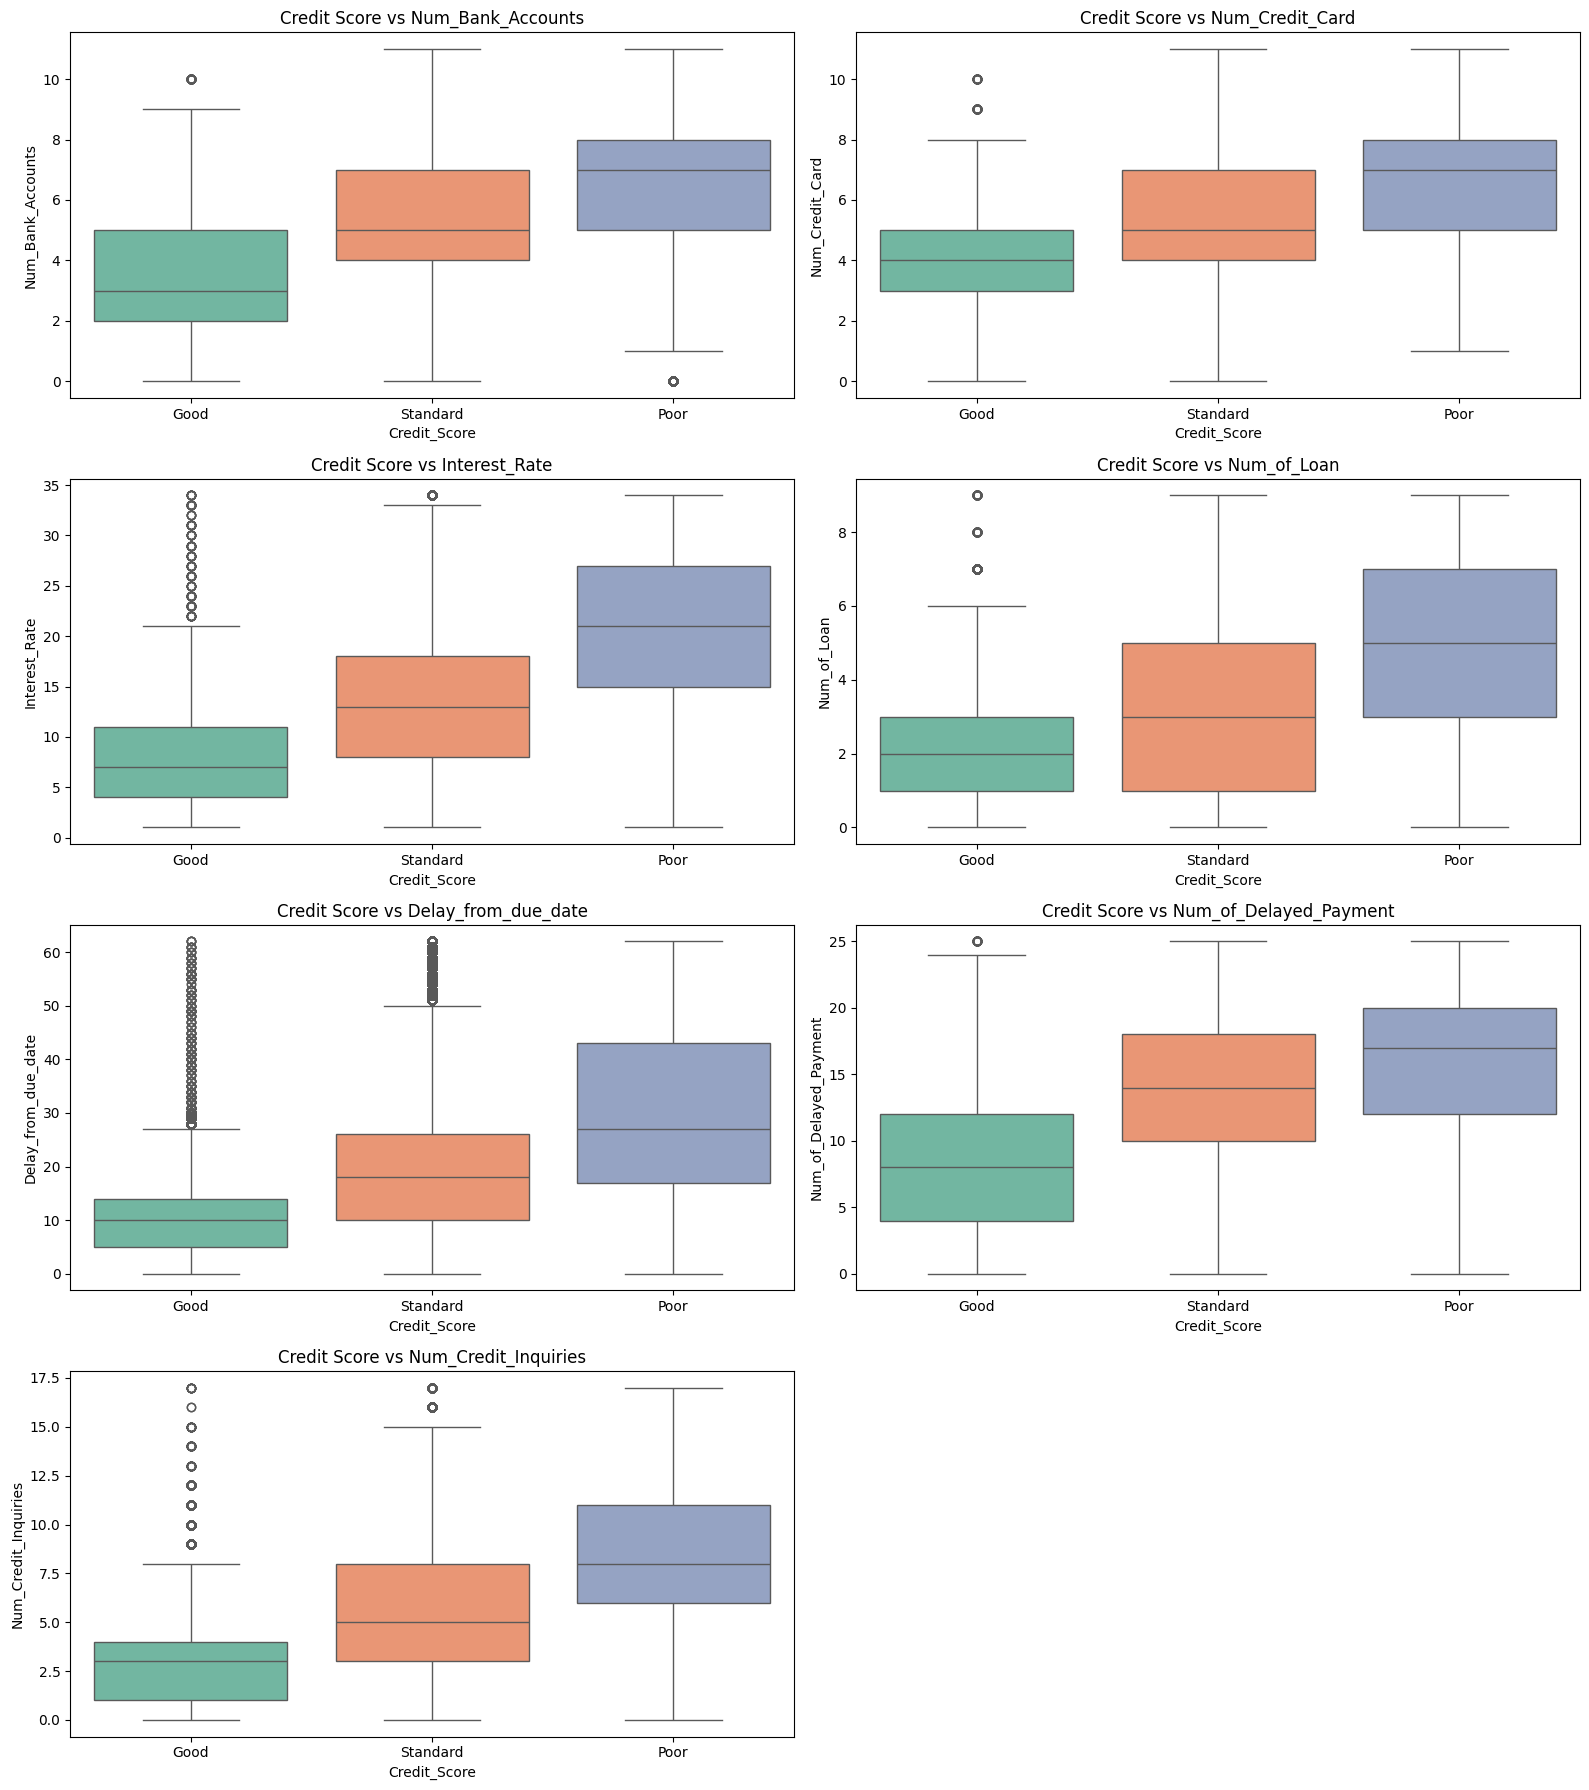

In [25]:
 # Credit Score vs. Numerical Columns

numerical_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

plt.figure(figsize=(16, 18))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Credit_Score', y=col, data=data, palette='Set2')
    plt.title(f'Credit Score vs {col}')

plt.tight_layout()
plt.show()

The credit score box plots show a trend: responsible credit behavior like having more bank accounts and credit cards (used wisely) and avoiding late payments is linked to higher credit scores.

Conversely, factors like having many loan inquiries or frequent delays in payments seem to be associated with lower credit scores.

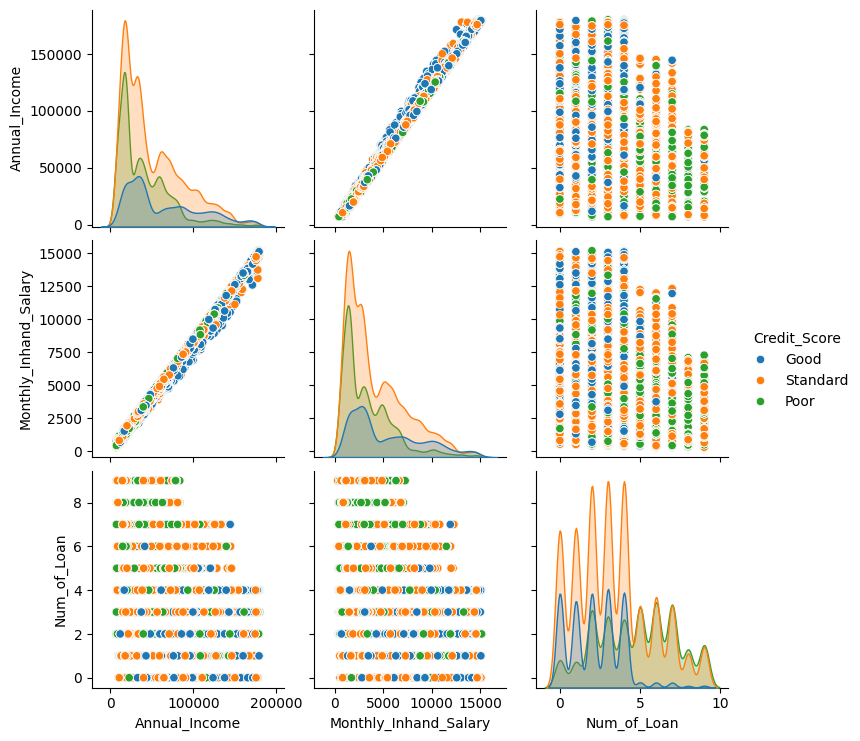

In [26]:
# Distribution of Annual_Income, Monthly_Inhand_Salary, Num_of_Loan

sns.pairplot(data, hue='Credit_Score', vars=['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan'])
plt.show()

**Annual Income vs. Monthly Inhand Salary:**
Strong linear relationship across all credit score categories.
As annual income increases, monthly in-hand salary increases proportionally.

**Annual Income vs. Number of Loans:**
No clear linear relationship; points are more dispersed.
Higher concentration of Poor credit scores at lower income levels.

**Monthly Inhand Salary vs. Number of Loans:**
Similar dispersion as Annual Income vs. Number of Loans.
No strong trend, but shows how loan numbers vary across salary levels and credit scores.

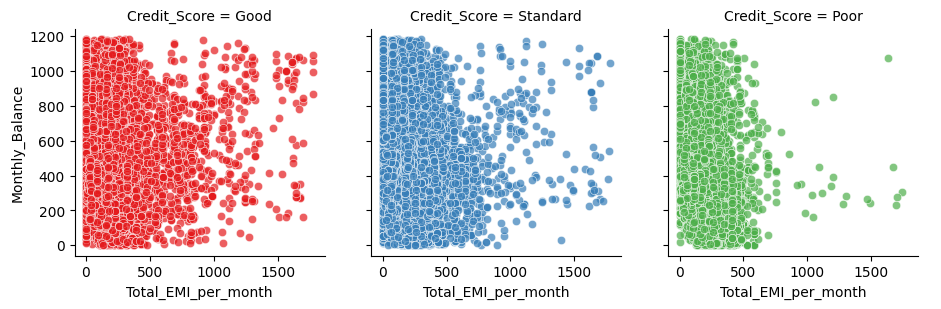

In [27]:
# # Distribution of Monthly Financial Metrics

palette = sns.color_palette("Set1", 3)
g = sns.FacetGrid(data, col="Credit_Score")

for i, ax in enumerate(g.axes.flat):
    sns.scatterplot(data=data[data['Credit_Score'] == g.col_names[i]], x="Total_EMI_per_month", y="Monthly_Balance", color=palette[i], alpha=.7, ax=ax)

g.add_legend()
plt.show()

Individuals with a **good credit score** tend to have a higher spread in their Monthly_Balance and Total_EMI_per_month compared to those with standard or poor credit scores.

There is no clear linear relationship between Total_EMI_per_month and Monthly_Balance across different credit score categories.

People with a **poor credit score** typically have lower Total_EMI_per_month and Monthly_Balance values, indicating more financial constraints.

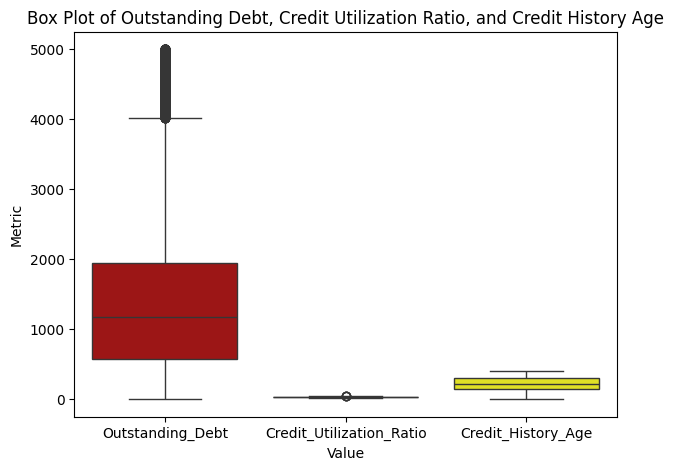

In [28]:
# financial behavior of individuals

plt.figure(figsize=(7,5))
sns.boxplot(data=data[["Outstanding_Debt", "Credit_Utilization_Ratio","Credit_History_Age"]], palette = "hot")
plt.title('Box Plot of Outstanding Debt, Credit Utilization Ratio, and Credit History Age')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.show()

**Outstanding Debt:** Most people have a median debt around 1000, with a wide range and some very high outliers.

**Credit Utilization Ratio**: Most people use very little of their available credit, with values close to 0.

**Credit History Age:** Credit history length varies widely, with a median around 10 years.

These insights show that individuals with high outstanding debt and long credit histories may be experienced credit users, while low credit utilization ratios suggest careful credit management.

## **Data Preprocessing**

In [29]:
# Removing columns which do not provide any valuable insights for the analysis

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'Age','Occupation','SSN', 'Type_of_Loan']
data = data.drop(columns_to_drop, axis=1)

In [30]:
data.shape

(100000, 20)

In [31]:
# Checking for duplicates

duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [32]:
# Checking for missing values

data.isna().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There is no duplicates and missing values found in the data

In [33]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### **Encoding**

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data['Credit_Mix'] = ordinal_encoder.fit_transform(data[['Credit_Mix']])
data['Payment_of_Min_Amount'] = ordinal_encoder.fit_transform(data[['Payment_of_Min_Amount']])
data['Payment_Behaviour'] = ordinal_encoder.fit_transform(data[['Payment_Behaviour']])

In [35]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,1.0,49.574949,21.46538,2.0,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1.0,809.98,31.944960,266.0,1.0,49.574949,21.46538,3.0,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,28.609352,267.0,1.0,49.574949,21.46538,4.0,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1.0,809.98,31.377862,268.0,1.0,49.574949,21.46538,5.0,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1.0,809.98,24.797347,269.0,1.0,49.574949,21.46538,1.0,341.489231,Good


### **Correlation**

In [36]:
# Mapping Credit_Score to numerical values
credit_map = {"Good": 1, "Standard": 2, "Poor": 3}
data['Credit_Score_Numeric'] = data['Credit_Score'].replace(credit_map)

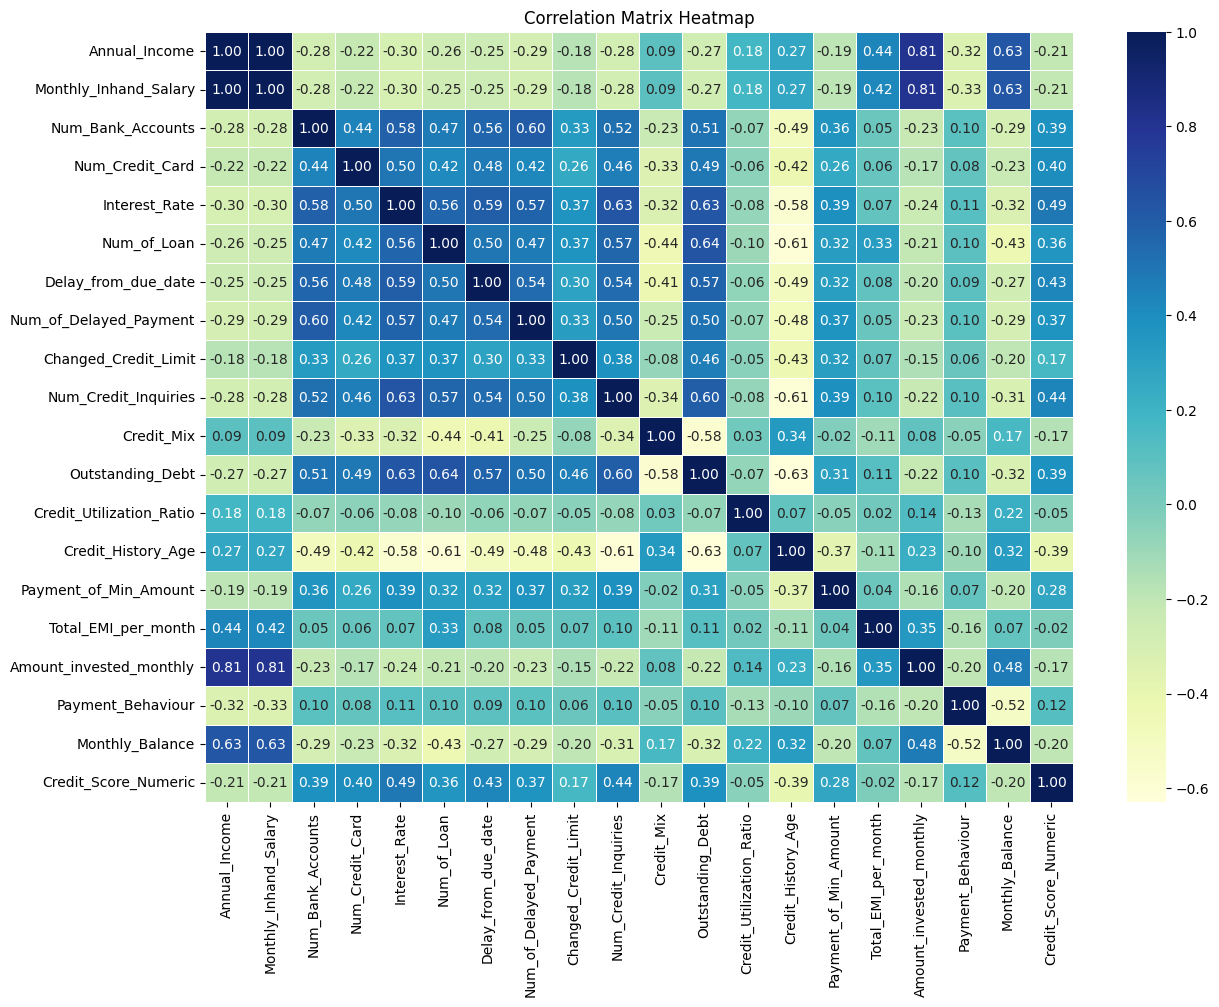

In [37]:
# Calculate correlation matrix using only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.81
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.81
Amount_invested_monthly and Annual_Income: 0.81
Amount_invested_monthly and Monthly_Inhand_Salary: 0.81


Based on the heatmap, we can see some high correlations (greater than 0.8) between predictors.

**Annual_Income** is highly correlated with both **Monthly_Inhand_Salary** and **Amount_invested_monthly**, can choose to retain Annual_Income and drop the other two columns.

Because Annual_Income might be a more straightforward.
Dropping Monthly_Inhand_Salary and Amount_invested_monthly removes redundancy.



In [39]:
# Drop highly correlated columns
columns_to_drop = ['Monthly_Inhand_Salary', 'Amount_invested_monthly']
data.drop(columns=columns_to_drop, inplace=True)

In [40]:
# Mapping back to categorical values
inverse_credit_map = {1: "Good", 2: "Standard", 3: "Poor"}
data['Credit_Score'] = data['Credit_Score_Numeric'].replace(inverse_credit_map)

# Drop the temporary numeric column if needed
data.drop(columns=['Credit_Score_Numeric'], inplace=True)

In [41]:
data.shape

(100000, 18)

### **Splitting data into training, validation, and testing sets**

In [42]:
from sklearn.model_selection import train_test_split

X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into training (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (72000, 17) (72000,)
Validation set: (8000, 17) (8000,)
Testing set: (20000, 17) (20000,)


### **Feature Importance using Random Forest**

Tree-based models like Random Forest can be used to identify the importance of different features in a dataset by measuring the impact of each feature on the prediction accuracy. These models work by constructing multiple decision trees during training and averaging their results to improve accuracy and control over-fitting. Feature importance is derived by evaluating how much each feature decreases the impurity in the data splits, with more significant features resulting in greater decreases in impurity. This method helps in selecting the most relevant features for the model, improving both efficiency and performance.

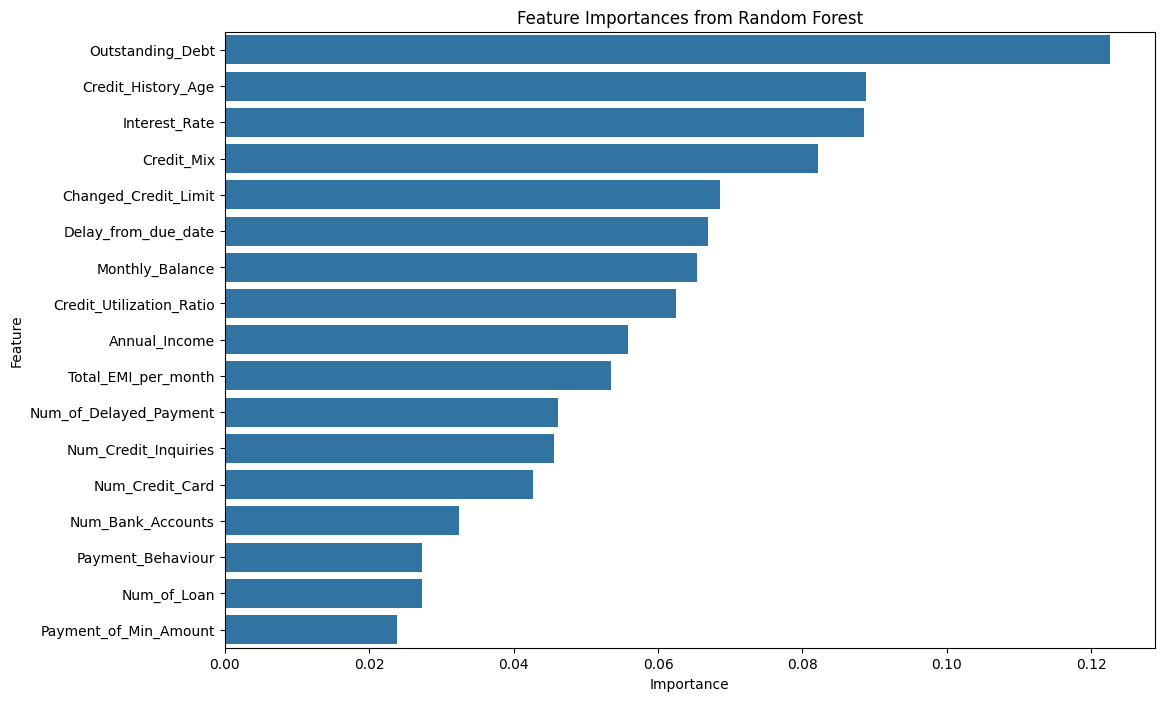

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


1.  Outstanding_Debt
2.  Interest_Rate
3.  Credit_History_Age
4. Credit_Mix
5. Changed_Credit_Limit
6.  Delay_from_due_date
7.   Credit_Utilization_Ratio
8.  Monthly_Balance
9.  Annual_Income

These features have the highest importance scores and should provide the most predictive power for the model.




In [44]:
important_features = ['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age', 'Credit_Mix',
                      'Changed_Credit_Limit', 'Delay_from_due_date', 'Credit_Utilization_Ratio',
                      'Monthly_Balance', 'Annual_Income']

X_train_selected = X_train[important_features]
X_val_selected = X_val[important_features]
X_test_selected = X_test[important_features]

### **Random forest**

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Perform the search on the training data
random_search.fit(X_train_selected, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_rf = random_search.best_estimator_

print("Best parameters found: ", best_params)

# Validate the model with the best parameters on the validation set
y_val_pred = best_rf.predict(X_val_selected)
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest - Validation Accuracy: 0.79225
              precision    recall  f1-score   support

        Good       0.71      0.76      0.74      1417
        Poor       0.78      0.80      0.79      2239
    Standard       0.83      0.80      0.81      4344

    accuracy                           0.79      8000
   macro avg       0.77      0.79      0.78      8000
weighted avg       0.79      0.79      0.79      8000

[[1079    6  332]
 [  65 1786  388]
 [ 373  498 3473]]


In [47]:
# Evaluate the model on the test set

y_test_pred = best_rf.predict(X_test_selected)
print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Random Forest - Test Accuracy: 0.78825
              precision    recall  f1-score   support

        Good       0.71      0.73      0.72      3527
        Poor       0.79      0.80      0.79      5874
    Standard       0.81      0.80      0.81     10599

    accuracy                           0.79     20000
   macro avg       0.77      0.78      0.77     20000
weighted avg       0.79      0.79      0.79     20000

[[2592   18  917]
 [ 164 4684 1026]
 [ 891 1219 8489]]


In [49]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(best_rf, X_train_selected, y_train, cv=skf, scoring='accuracy')

print("Stratified Cross-Validation Accuracy Scores: ", cv_results)
print("Mean Accuracy: ", cv_results.mean())
print("Standard Deviation: ", cv_results.std())

Stratified Cross-Validation Accuracy Scores:  [0.779375   0.78576389 0.775625   0.77833333 0.7825    ]
Mean Accuracy:  0.7803194444444443
Standard Deviation:  0.003500606208524537


### **kNN**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the search on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Validate the model with the best parameters on the validation set
y_val_pred = best_knn.predict(X_val_selected)
print("k-NN - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
k-NN - Validation Accuracy: 0.772625
              precision    recall  f1-score   support

        Good       0.72      0.73      0.73      1417
        Poor       0.76      0.78      0.77      2239
    Standard       0.80      0.78      0.79      4344

    accuracy                           0.77      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.77      0.77      0.77      8000

[[1037    9  371]
 [   4 1740  495]
 [ 400  540 3404]]


In [51]:
# Evaluate the model on the test set

y_test_pred = best_knn.predict(X_test_selected)
print("k-NN - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

k-NN - Test Accuracy: 0.77015
              precision    recall  f1-score   support

        Good       0.71      0.72      0.72      3527
        Poor       0.77      0.78      0.78      5874
    Standard       0.79      0.78      0.78     10599

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000

[[2542   23  962]
 [  23 4607 1244]
 [1014 1331 8254]]


In [52]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(best_knn, X_train_selected, y_train, cv=skf, scoring='accuracy')

print("Stratified Cross-Validation Accuracy Scores: ", cv_results)
print("Mean Accuracy: ", cv_results.mean())
print("Standard Deviation: ", cv_results.std())

Stratified Cross-Validation Accuracy Scores:  [0.76659722 0.76666667 0.75763889 0.76652778 0.76840278]
Mean Accuracy:  0.7651666666666667
Standard Deviation:  0.003828549752827653


### **Decision Tree**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Perform the search on the training data
random_search.fit(X_train_selected, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_dt = random_search.best_estimator_

print("Best parameters found: ", best_params)

# Validate the model with the best parameters on the validation set
y_val_pred = best_dt.predict(X_val_selected)
print("Decision Tree - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Decision Tree - Validation Accuracy: 0.707
              precision    recall  f1-score   support

        Good       0.52      0.76      0.62      1417
        Poor       0.72      0.69      0.70      2239
    Standard       0.80      0.70      0.75      4344

    accuracy                           0.71      8000
   macro avg       0.68      0.71      0.69      8000
weighted avg       0.73      0.71      0.71      8000

[[1070   82  265]
 [ 205 1534  500]
 [ 769  523 3052]]


In [54]:
# Evaluate the model on the test set

y_test_pred = best_dt.predict(X_test_selected)
print("Decision Tree - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Decision Tree - Test Accuracy: 0.7019
              precision    recall  f1-score   support

        Good       0.53      0.74      0.62      3527
        Poor       0.72      0.67      0.69      5874
    Standard       0.78      0.71      0.74     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.71      0.68     20000
weighted avg       0.72      0.70      0.71     20000

[[2618  199  710]
 [ 564 3937 1373]
 [1789 1327 7483]]


In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(best_dt, X_train_selected, y_train, cv=skf, scoring='accuracy')

print("Stratified Cross-Validation Accuracy Scores: ", cv_results)
print("Mean Accuracy: ", cv_results.mean())
print("Standard Deviation: ", cv_results.std())

Stratified Cross-Validation Accuracy Scores:  [0.70243056 0.710625   0.70145833 0.69854167 0.70486111]
Mean Accuracy:  0.7035833333333333
Standard Deviation:  0.004061544284543585


### **Logistic regression**

In [61]:
from sklearn.linear_model import LogisticRegression

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Initialize the model
lr = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Perform the search on the training data
random_search.fit(X_train_selected, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_lr = random_search.best_estimator_

print("Best parameters found: ", best_params)

# Validate the model with the best parameters on the validation set
y_val_pred = best_lr.predict(X_val_selected)
print("Logistic Regression - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'C': 100}
Logistic Regression - Validation Accuracy: 0.62925
              precision    recall  f1-score   support

        Good       0.53      0.50      0.51      1417
        Poor       0.64      0.49      0.55      2239
    Standard       0.66      0.75      0.70      4344

    accuracy                           0.63      8000
   macro avg       0.61      0.58      0.59      8000
weighted avg       0.63      0.63      0.62      8000

[[ 711   21  685]
 [ 135 1086 1018]
 [ 504  603 3237]]


In [62]:
# Evaluate the model on the test set

y_test_pred = best_lr.predict(X_test_selected)
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Logistic Regression - Test Accuracy: 0.62665
              precision    recall  f1-score   support

        Good       0.53      0.50      0.51      3527
        Poor       0.65      0.49      0.56      5874
    Standard       0.65      0.74      0.69     10599

    accuracy                           0.63     20000
   macro avg       0.61      0.58      0.59     20000
weighted avg       0.63      0.63      0.62     20000

[[1746   51 1730]
 [ 375 2901 2598]
 [1191 1522 7886]]


In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(best_lr, X_train_selected, y_train, cv=skf, scoring='accuracy')

print("Stratified Cross-Validation Accuracy Scores: ", cv_results)
print("Mean Accuracy: ", cv_results.mean())
print("Standard Deviation: ", cv_results.std())

Stratified Cross-Validation Accuracy Scores:  [0.62618056 0.62777778 0.62354167 0.62138889 0.62069444]
Mean Accuracy:  0.6239166666666666
Standard Deviation:  0.002718322035991688


In [74]:
# Results data
results = {
    'Model': ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression'],
    'Validation Accuracy': [0.792, 0.772, 0.707, 0.629],
    'Test Accuracy': [0.788, 0.770, 0.701, 0.626],
    'Cross-Validation Accuracy': [0.780, 0.765, 0.703, 0.623]
}

# Create a DataFrame
df = pd.DataFrame(results)
df

,Model,Validation Accuracy,Test Accuracy,Cross-Validation Accuracy
0,Random Forest,0.792,0.788,0.780
1,K-Nearest Neighbors,0.772,0.770,0.765
2,Decision Tree,0.707,0.701,0.703
3,Logistic Regression,0.629,0.626,0.623
